In [3]:
import numpy as np 
np.random.seed(0)

X = [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]]
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
output = []

for i in inputs: 
    '''
    # ReLU: activaiton
    if i > 0:
        output.append(i)
    elif i == 0:
        output.append(0)
    '''
    output.append(max(0, i))
print('output:')
print(output)
"""
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward (self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

layer1 = Layer_Dense (4, 5)
layer2 = Layer_Dense (5, 2)

layer1.forward(X) 
print(layer1.output)
layer2.forward(layer1.output)  
print(layer2.output)
"""

output:
[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


'\nclass Layer_Dense:\n    def __init__(self, n_inputs, n_neurons):\n        self.weights = 0.10 * np.random.randn(n_inputs,n_neurons)\n        self.biases = np.zeros((1, n_neurons))\n        \n    def forward (self, inputs):\n        self.output = np.dot(inputs, self.weights) + self.biases\n\nlayer1 = Layer_Dense (4, 5)\nlayer2 = Layer_Dense (5, 2)\n\nlayer1.forward(X) \nprint(layer1.output)\nlayer2.forward(layer1.output)  \nprint(layer2.output)\n'

start here:


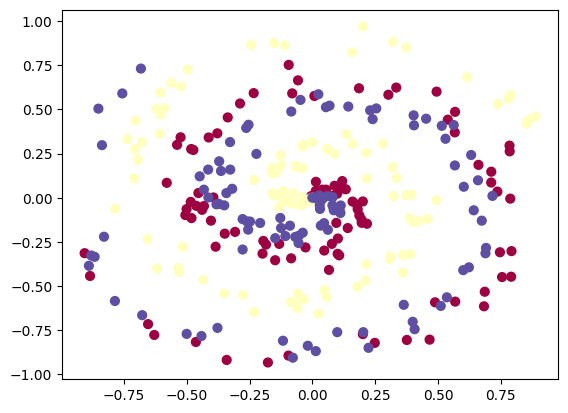

In [17]:
# https://cs231n.github.io/neural-networks-case-study/
#N = 100, number of points per class; D = 2, No. of dimensionality; K = 3,  number of classes
def create_data (points, classes):  # no. of features = 300; no of output = 3.
    # no. of features = 2;
    X = np.zeros((points * classes, 2)) # data matrix (each row = single example)
    y = np.zeros(points * classes , dtype='uint8') # class labels
    for class_number in range(classes):
        ix = range(points * class_number, points *(class_number+1))
        r = np.linspace(0.0,1, points) # radius
        t = np.linspace(class_number*4,(class_number+1)*4,points) \
        + np.random.randn(points)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y
# lets visualize the data:
import matplotlib.pyplot as plt
print("start here:")
X, y = create_data(100, 3) # no. of point = 300, No. of ouput = 3
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [27]:
import nnfs  # pip install nnfs
import numpy as np 
from nnfs.datasets import spiral_data

nnfs.init()
# 100 points, No of features = 2 (set inside class create_data), 3 output in y
X, y = create_data(100, 3)  
print('X.shape:', X.shape)  # (300, 2), no of samples = 300, no of features = 2
print('y.shape:', y.shape)  # (300, )
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward (self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward (self, inputs):
        self.output = np.maximum (0, inputs)

# number of features = 2; first layer neuron = 5 (output to second layer)
layer1 = Layer_Dense (2, 5) 
activation1 = Activation_ReLU()
layer1.forward(X)
print('layer1.output:')
print(layer1.output)
activation1.forward(layer1.output)
print('activation1.output:')
print(activation1.output)

X.shape: (300, 2)
y.shape: (300,)
layer1.output:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-8.35815910e-04 -7.90404272e-04 -1.33452227e-03  4.65504505e-04
   4.56846210e-05]
 [-2.39994470e-03  5.93469958e-05 -2.24808278e-03  2.03573116e-04
   6.10024377e-04]
 ...
 [ 1.13291524e-01 -1.89262271e-01 -2.06855070e-02  8.11079666e-02
  -6.71350807e-02]
 [ 1.34588361e-01 -1.43197834e-01  3.09493970e-02  5.66337556e-02
  -6.29687458e-02]
 [ 1.07817926e-01 -2.00809643e-01 -3.37579325e-02  8.72561932e-02
  -6.81458861e-02]]
activation1.output:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.65504505e-04
  4.56846210e-05]
 [0.00000000e+00 5.93469958e-05 0.00000000e+00 2.03573116e-04
  6.10024377e-04]
 ...
 [1.13291524e-01 0.00000000e+00 0.00000000e+00 8.11079666e-02
  0.00000000e+00]
 [1.34588361e-01 0.00000000e+00 3.09493970e-02 5.66337556e-02
  0.00000000e+00]
 [1.078179